In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

In [2]:
# Step 2: Load Dataset (Mall Customers)
df = pd.read_csv('Mall_Customers.csv')

In [3]:
# Step 3: Select Features (Annual Income and Spending Score)
X = df.iloc[:, [3, 4]].values  # 3: Annual Income, 4: Spending Score

In [6]:
# Step 4: Optional - Scale the data (optional for hierarchical but helpful for some datasets)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]
 [-1.66266033  1.00159627]
 [-1.62449091 -1.71591298]
 [-1.62449091  1.70038436]
 [-1.58632148 -1.83237767]
 [-1.58632148  0.84631002]
 [-1.58632148 -1.4053405 ]
 [-1.58632148  1.89449216]
 [-1.54815205 -1.36651894]
 [-1.54815205  1.04041783]
 [-1.54815205 -1.44416206]
 [-1.54815205  1.11806095]
 [-1.50998262 -0.59008772]
 [-1.50998262  0.61338066]
 [-1.43364376 -0.82301709]
 [-1.43364376  1.8556706 ]
 [-1.39547433 -0.59008772]
 [-1.39547433  0.88513158]
 [-1.3573049  -1.75473454]
 [-1.3573049   0.88513158]
 [-1.24279661 -1.4053405 ]
 [-1.24279661  1.23452563]
 [-1.24279661 -0.7065524 ]
 [-1.24279661  0.41927286]
 [-1.20462718 -0.74537397]
 [-1.20462718  1.42863343]
 [-1.16645776 -1.7935561 ]
 [-1.16645776  0.88513158]
 [-1.05194947 -1.7935561 ]
 [-1.05194947  1.62274124]
 [-1.05194947 -1.4053405 ]
 [-1.05194947  1.19570407]
 [-1.01378004 -1.28887582]
 

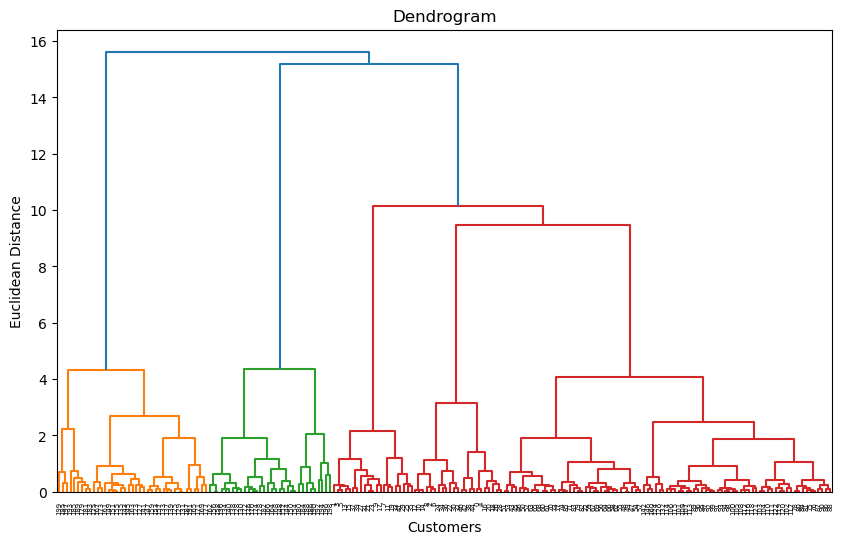

In [7]:
# Step 5: Plot Dendrogram to decide number of clusters
plt.figure(figsize=(10, 6))
dendro = dendrogram(linkage(X_scaled, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

In [9]:
# Step 6: Fit Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=5,linkage='ward')
y_pred = model.fit_predict(X_scaled)

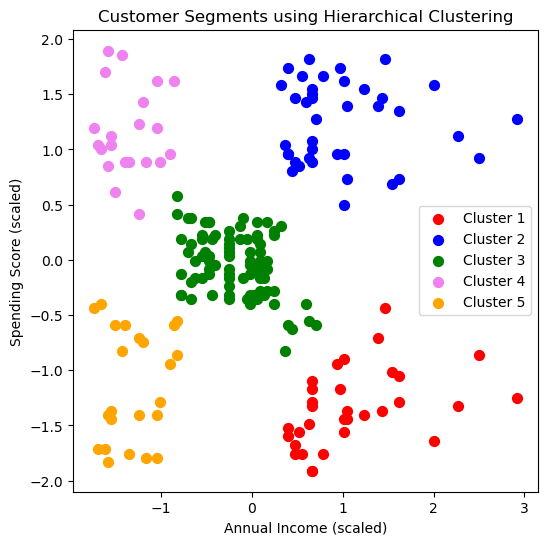

In [12]:
# Step 7: Visualize Clusters
plt.figure(figsize=(6, 6))
plt.scatter(X_scaled[y_pred == 0, 0], X_scaled[y_pred == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_pred == 1, 0], X_scaled[y_pred == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_pred == 2, 0], X_scaled[y_pred == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_pred == 3, 0], X_scaled[y_pred == 3, 1], s=50, c='violet', label='Cluster 4')
plt.scatter(X_scaled[y_pred == 4, 0], X_scaled[y_pred == 4, 1], s=50, c='orange', label='Cluster 5')
plt.title("Customer Segments using Hierarchical Clustering")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.show()